# Project Goal:
- Explore the biodiversity of the national parks
- Ask questions while exploring the data and ponder on the observation
- Analyze any significance in the observation and pattern

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fdir = '/Users/CH/code/python/biodiversity_codecademy'
df_spec = pd.read_csv(f'{fdir}/species_info.csv',encoding='utf-8')
df_obs = pd.read_csv(f'{fdir}/observations.csv',encoding='utf-8')

In [3]:
df_spec.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
df_obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
# number of unique items
print(f'# of unique species: {df_spec.scientific_name.nunique()}')
print(f'# of unique categories: {df_spec.category.nunique()}')
print(f'# of unique conseravation status: {df_spec.conservation_status.unique()}')

# of unique species: 5541
# of unique categories: 7
# of unique conseravation status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [6]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby('Animal').count()

,Max Speed
Animal,
Falcon,2
Parrot,2


In [7]:
# groupby 'category' and count the # of convservation status avaiable in each 'category'

print(df_spec.groupby('category')['conservation_status'].count())
# df_spec.loc[df_spec['category']=='Fish','conservation_status'].count()

category
Amphibian             7
Bird                 79
Fish                 11
Mammal               38
Nonvascular Plant     5
Reptile               5
Vascular Plant       46
Name: conservation_status, dtype: int64


In [8]:
# category vs. conservation status
#clean data
df_spec.fillna('No Intervention', inplace=True)

# aggregate via conservation status and category
tmp = df_spec.groupby(['category','conservation_status']).count()
print(tmp.unstack())

                    scientific_name                              \
conservation_status      Endangered In Recovery No Intervention   
category                                                          
Amphibian                       1.0         NaN            73.0   
Bird                            4.0         3.0           442.0   
Fish                            3.0         NaN           116.0   
Mammal                          7.0         1.0           176.0   
Nonvascular Plant               NaN         NaN           328.0   
Reptile                         NaN         NaN            74.0   
Vascular Plant                  1.0         NaN          4424.0   

                                                  common_names              \
conservation_status Species of Concern Threatened   Endangered In Recovery   
category                                                                     
Amphibian                          4.0        2.0          1.0         NaN   
Bird             

### What is the distribution of conservation status for species?

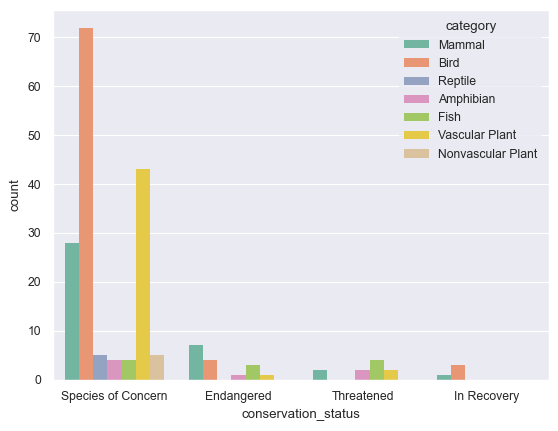

In [9]:
# plot countplot of conservation_status for each 'category' via seaborn
# distribution of Conservation Status per Specie category
sns.set()
sns.set_context("paper",rc = {'font':'futura std','patch.linewidth': 0.0})
df_tmp = df_spec[df_spec['conservation_status'] != 'No Intervention']
ax = sns.countplot(df_tmp, x='conservation_status', hue='category', palette='Set2', stat='count')

#### What I found in the data...
- Species of concern: bird, vascular plant, mammal
- endangered: mammal, bird
- threatened: fish
- In recovery: bird

Questions that came to mind:
- what does 'Species in concern' mean?
- why is that birds are in species of concern but also in recovery? let's look deeper and see what kind of birds?

### Are certain types of species more likely to be endangered?

In [10]:
# create a new column of 'is_protected': 1 is protected, 0 is not protected
df_spec['is_protected'] = (df_spec['conservation_status']!='No Intervention') 
df_spec.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [11]:
# use crosstab BUT problem is that the count is not counting UNIQUE scientific names...
# so crosstab is more limited or is there another way to make the table using unique scientific name?

ctab = pd.crosstab(df_spec['category'],df_spec['is_protected'])
tmp3 = ctab.reset_index()
tmp3.columns = ['category','not protected','protected']
tmp3['Protected_perc'] = 100.*tmp3['protected']/(tmp3['protected'] + tmp3['not protected'])
tmp3

,category,not protected,protected,Protected_perc
0,Amphibian,73,7,8.750000
1,Bird,442,79,15.163148
2,Fish,116,11,8.661417
3,Mammal,176,38,17.757009
4,Nonvascular Plant,328,5,1.501502
5,Reptile,74,5,6.329114
6,Vascular Plant,4424,46,1.029083


In [12]:
# scientific_name is more unique than common_name to count
tmp1 = df_spec.groupby(['category','is_protected']).scientific_name.nunique()
tmp2 = tmp1.reset_index().pivot(index = 'category',columns='is_protected').reset_index()
tmp2.columns = ['category','not protected','protected']

# # added another column of percent of Protected
tmp2['Protected_perc'] = 100.*tmp2['protected']/(tmp2['protected'] + tmp2['not protected'])
tmp2

,category,not protected,protected,Protected_perc
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Are the differences between species and their conservation status significant?

In [13]:
from scipy.stats import chi2_contingency

# chi2 test via contingency table: mammal vs bird
the_category_of_interest = ['Mammal','Bird']
the_col_of_interest = ['protected','not protected']
tab = tmp2.loc[tmp2['category'].isin(the_category_of_interest),the_col_of_interest]
print(tab)

# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(tab)
print(f'test stats = {c}, p-value = {p}, deg of freedom = {dof}, expected freq = {expected}')

   protected  not protected
1         75            413
3         30            146
test stats = 0.16170148316545574, p-value = 0.6875948096661336, deg of freedom = 1, expected freq = [[ 77.1686747 410.8313253]
 [ 27.8313253 148.1686747]]


**FINDINGS:** Using the significance level = 5% or 0.05, p-value = 0.68 >> 0.05. Therefore, we accept the null hypothesis that there is no difference of being endangered between the mammal and bird.

In [14]:
# chi2 test via contingency table: mammal vs bird
the_category_of_interest = ['Mammal','Reptile']
the_col_of_interest = ['protected','not protected']
tab = tmp2.loc[tmp2['category'].isin(the_category_of_interest),the_col_of_interest]
print(tab)

# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(tab)
print(f'test stats = {c}, p-value = {p}, deg of freedom = {dof}, expected freq = {expected}')

   protected  not protected
3         30            146
5          5             73
test stats = 4.289183096203645, p-value = 0.03835559022969898, deg of freedom = 1, expected freq = [[ 24.2519685 151.7480315]
 [ 10.7480315  67.2519685]]


**FINDINGS:** with significant level of 0.05, p-value = 0.038355 < 0.05. Therefore, we reject the null hypothesis and there is a statistically significant difference of being endangered between Mammal and Reptile. Mammals are statistically at higher need of protection compared to reptiles.

In [15]:
# chi2 test via contingency table: mammal vs bird
the_category_of_interest = ['Vascular Plant','Amphibian']
the_col_of_interest = ['protected','not protected']
tab = tmp2.loc[tmp2['category'].isin(the_category_of_interest),the_col_of_interest]
print(tab)

# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(tab)
print(f'test stats = {c}, p-value = {p}, deg of freedom = {dof}, expected freq = {expected}')

   protected  not protected
0          7             72
6         46           4216
test stats = 32.7572979770742, p-value = 1.0441355146657018e-08, deg of freedom = 1, expected freq = [[9.64524303e-01 7.80354757e+01]
 [5.20354757e+01 4.20996452e+03]]


### Which animal is most prevalent and what is their distribution amongst parks?

In [16]:
# perform a inner join vis pandas merge (instead of pandas join which does a left join)
tmp4 = pd.merge(df_obs, df_spec, on='scientific_name')

# only look at animal (not plants data)
omit_group = ['Vascular Plant','Nonvascular Plant']
tmp5 = tmp4.loc[~tmp4['category'].isin(omit_group),:]
tmp5.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink,No Intervention,False
6,Neovison vison,Bryce National Park,91,Mammal,American Mink,No Intervention,False
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink,No Intervention,False
24,Spizella pusilla,Yellowstone National Park,228,Bird,Field Sparrow,No Intervention,False


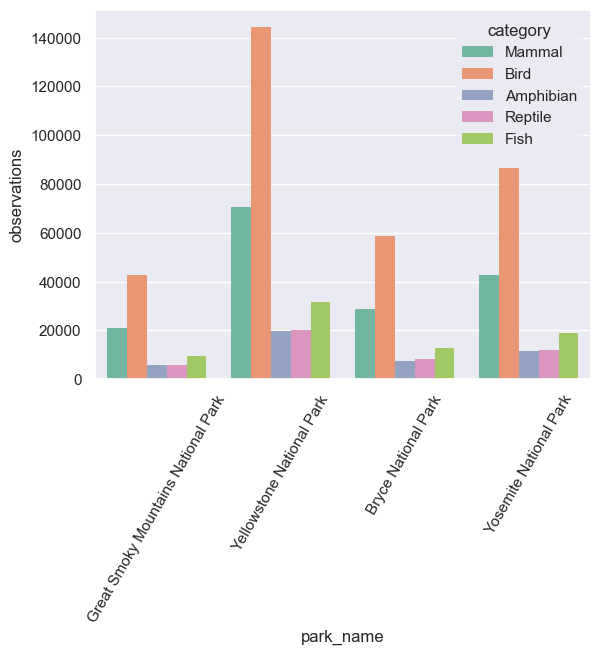

In [17]:
# distribution of species among the parks
sns.set()
sns.set_context(rc = {'font':'futura std','patch.linewidth': 0.0})
ax = sns.barplot(tmp5, x='park_name', y='observations',hue='category', estimator='sum',palette='Set2',errorbar=None)
ax.tick_params(axis='x', rotation=60)

In [55]:
import re

def convert_2_simple_text(ss):
    # parentheses
    check_p = re.search(r'\((.*?)\)',ss)
    if check_p:
        return check_p.group(1)
    else:
        check1 = re.search(r'.([.?,;]).', ss)
        if check1:
            punc = check1.group(1)
            ss_tmp1 = ss.split(punc)[0]
        else:
            ss_tmp1 = ss
    
        # return simplifier animal text
        check2 = re.search(r' ',ss_tmp1)
        if check2:
            oh = ss_tmp1.split(' ')
            return oh[len(oh)-1]
        else:
            return ss_tmp1      

In [56]:
ss = 'Panther (Mountain Lion)'
convert_2_simple_text(ss)

'Mountain Lion'

In [66]:
data = [[1, np.nan, 3], [1, np.nan, 6], [7, 8, 9]]
df = pd.DataFrame(data, columns=["a", "b", "c"],
                  index=["cow", "horse", "bull"])
df

# not understanding groupby as well.....
# todo: need to see where bats are most observed (which national park...)

,a,b,c
cow,1,NaN,3
horse,1,NaN,6
bull,7,8.0,9


In [67]:
# look at the common names of the animals and figure out which common animals are most prevelant in the parks
# only look at Mammals
tmp6 = tmp4[tmp4['category']=='Mammal']

# avoid copywarning message from python: ensure to make another copy of the dataframe when applying a new function
tmp7 = tmp6.copy()

tmp7['simple_animal_name']= tmp7['common_names'].apply(convert_2_simple_text)
tmp7.groupby('simple_animal_name').count()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
simple_animal_name,,,,,,,
Antelope,4,4,4,4,4,4,4
Badger,16,16,16,16,16,16,16
Bat,136,136,136,136,136,136,136
Bear,24,24,24,24,24,24,24
Beaver,40,40,40,40,40,40,40
Bison,8,8,8,8,8,8,8
Bobcat,4,4,4,4,4,4,4
Cat,4,4,4,4,4,4,4
Chickaree,4,4,4,4,4,4,4


The data show that bats are most prevalent within the mammal group. Let's see bat's distribution in the nationals parks...

Text(0.5, 1.0, 'Distribution of Bats in national parks')

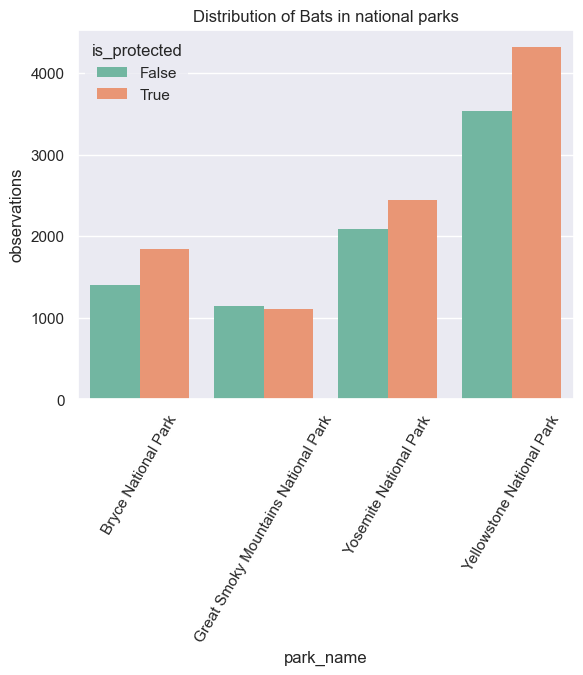

In [70]:
tmp8 = tmp7[tmp7['simple_animal_name']=='Bat']

sns.set()
sns.set_context(rc = {'font':'futura std','patch.linewidth': 0.0})
ax = sns.barplot(tmp8, x='park_name', y='observations', hue='is_protected',estimator='sum',palette='Set2',errorbar=None)
ax.tick_params(axis='x', rotation=60)
ax.set_title('Distribution of Bats in national parks')

### conclusion
- we have found that bats are prevalent in all the national parks and they are most found in yellowstone national park
- Half or more than half of the bat population in the national parks are protected.